<a href="https://colab.research.google.com/github/MiuChan24/Face-Mask-Detection-Model/blob/main/Face_Mask_detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import imutils
import numpy as np



In [4]:

!unzip train.zip
!unzip test.zip

Archive:  train.zip
   creating: train/
   creating: train/with_mask/
  inflating: train/with_mask/-110603108-gettyimages-533567012.jpg  
  inflating: train/with_mask/-110695084-mask2.jpg  
  inflating: train/with_mask/0-with-mask.jpg  
  inflating: train/with_mask/0000305-62360-halyard-health-pfr-p3-respirator-face-mask-ffp.jpeg  
  inflating: train/with_mask/0000444-48296-halyard-health-surgical-mask-teddy-bear-print.jpeg  
  inflating: train/with_mask/007563.jpg  
  inflating: train/with_mask/0779db20580fc7b054ad6b1b7bd9fb35.jpeg  
  inflating: train/with_mask/1-respirator-mask.jpg  
  inflating: train/with_mask/10-with-mask.jpg  
  inflating: train/with_mask/100-with-mask.jpg  
  inflating: train/with_mask/101-with-mask.jpg  
  inflating: train/with_mask/103-with-mask.jpg  
  inflating: train/with_mask/104-with-mask.jpg  
  inflating: train/with_mask/105-with-mask.jpg  
  inflating: train/with_mask/106.jpg  
  inflating: train/with_mask/107-with-mask.jpg  
  inflating: train/with_m

In [8]:
model =Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),

    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

TRAINING_DIR = "/content/train"
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    target_size=(150, 150))
VALIDATION_DIR = "/content/test"
validation_datagen = ImageDataGenerator(rescale=1.0/255)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                         batch_size=10,
                                                         target_size=(150, 150))
checkpoint = ModelCheckpoint('model2-{epoch:03d}.keras',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')


history = model.fit(train_generator,
                              epochs=10,
                              validation_data=validation_generator,
                              callbacks=[checkpoint])

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - acc: 0.4832 - loss: 0.7431 - val_acc: 0.5000 - val_loss: 0.6931
Epoch 2/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - acc: 0.5226 - loss: 0.6931 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 3/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - acc: 0.5214 - loss: 0.6899 - val_acc: 0.5000 - val_loss: 0.6901
Epoch 4/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - acc: 0.4891 - loss: 0.6960 - val_acc: 0.5000 - val_loss: 0.6935
Epoch 5/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - acc: 0.5217 - loss: 0.6933 - val_acc: 0.4948 - val_loss: 0.6931
Epoch 6/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - acc: 0.5001 - loss: 0.6933 - val_acc: 0.5052 - val_loss: 0.6932
Epoch 7/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - acc: 0.5345 - loss: 0.6928 - val_acc: 0.5052 - val_loss: 0.6936
Epoch 8/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - acc: 0.4845 - loss: 0.6935 - val_acc: 0.5000 - val_loss: 0.6932
Epoch 9/10
132/132 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/

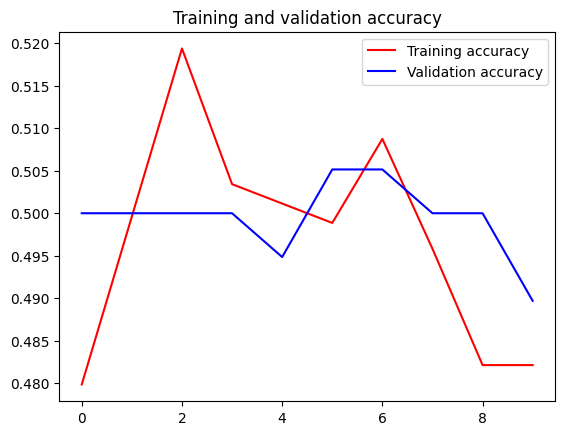

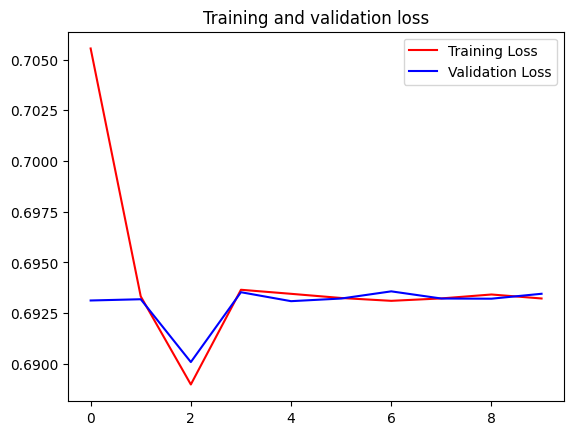

In [19]:

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
!ls -l *.keras


-rw-r--r-- 1 root root 78916162 May 26 11:51 model2-001.keras
-rw-r--r-- 1 root root 78916162 May 26 11:58 model2-003.keras


In [20]:

import os
import random
from tensorflow.keras.preprocessing import image

TEST_DIR = "/content/test"

test_image_paths = []
for root, _, files in os.walk(TEST_DIR):
  for file in files:
    if file.endswith(('jpg', 'jpeg', 'png')): # Add other image extensions if needed
      test_image_paths.append(os.path.join(root, file))

if len(test_image_paths) < 5:
  print("Less than 5 images in the test set.")
else:

  random_image_paths = random.sample(test_image_paths, 5)

  print("Making predictions on 5 random test images:")

  for img_path in random_image_paths:

    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale the image


    predictions = model.predict(img_array)

    class_labels = list(validation_generator.class_indices.keys())
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]
    confidence = predictions[0][predicted_class_index] * 100

    print(f"Image: {os.path.basename(img_path)}")
    print(f"Predicted class: {predicted_class} (Confidence: {confidence:.2f}%)")
    print("-" * 20)

loss, accuracy = model.evaluate(validation_generator)
print(f"\nOverall Accuracy on Test Set: {accuracy * 100:.2f}%")

Making predictions on 5 random test images:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
Image: 310.jpg
Predicted class: with_mask (Confidence: 59.87%)
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image: 456-with-mask.jpg
Predicted class: with_mask (Confidence: 65.94%)
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Image: 91-with-mask.jpg
Predicted class: with_mask (Confidence: 61.86%)
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Image: 98-with-mask.jpg
Predicted class: with_mask (Confidence: 60.77%)
--------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Image: 219-with-mask.jpg
Predicted class: with_mask (Confidence: 61.85%)
--------------------
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 296ms/step - acc: 0.5322 - loss: 0.6832

Overall Accuracy on Test Set: 50.00%
